# 第9章：モンテカルロ・シミュレーション（1/2）

モンテカルロ・シミュレーションとは，数多くの乱数を用いた試行をくり返すことで，統計的な特徴を推定するシミュレーション手法です。

## はじめに

In [1]:
# CELL PROVIDED

# %pip install -q japanize-matplotlib-jlite py4macro

In [2]:
# CELL PROVIDED

import japanize_matplotlib_jlite
import numpy as np
import matplotlib.pyplot as plt
import py4macro
import random

plt.rcParams['figure.figsize'] = (5, 3.75)

## 大数の法則

### 大数の法則とは

大数の法則は母集団と標本の関係を示す法則になります。母集団のパラメータを次のように表記します。
\begin{equation}
  \text{母集団の平均： }\mu\qquad\text{(「ミュー」と読む)}
\end{equation}
母集団から標本$X_1,X_2\cdots X_n$を無作為に抽出し（$n$は標本の大きさ），その標本平均を次のように表します。
\begin{equation}
  \text{標本の平均： }\overline{X}_n
  =\frac{X_1+X_2+\cdots+X_n}{n}
\end{equation}

**大数の法則（Law of Large Numbers）**

平均$\mu$ を持つ母集団から無作為抽出されたデータ$X_1, X_2, \dots, X_n$を考えます。標本平均$\overline{X}_n$は，標本の大きさ$n$ が大きくなるにつれて，母平均$\mu$ に近づきます。すなわち，
\begin{equation}
\lim_{n \rightarrow \infty} \overline{X}_n = \mu
\end{equation}



### コイントスの平均

母平均：$\mu=0.5\times 1 +0.5\times 0 = 0.5$

コード9.2.1

In [3]:
random.randint(0,1)

1

平均の計算：コード9.2.2

In [4]:
n = 30
toss = [random.randint(0,1) for _ in range(n)]
head = sum(toss)
avr = head / n
avr

0.43333333333333335

### シミュレーション1:実現値の総入れ替え

授業では扱わない

### シミュレーション2:実現値の逐次的追加

ループの各回で1個のコインを投げて出た結果を逐次的に追加しながら，その時点までの平均の推移を計算します。次の手順となります。
* `1`回目のループ
  * `1`個のコインを`1`回トスした結果$X_1$を使い平均を計算する。
  * $\overline{X}_1=X_1$
* `2`回目のループ
  * 新たに`1`個のコインをトスした結果$X_2$を使い，`1`〜`2`回目の結果の平均を計算する。
  * $\overline{X}_2=(X_1+X_2)/2$
* `3`回目のループ
  * 新たに`1`個のコインをトスしした結果$X_3$を使い，`1`〜`3`回目の結果を使い平均を計算する。
  * $\overline{X}_3=(X_1+X_2+X_3)/3$
* $\cdots\cdots$
* `N`回目のループ
  * 新たに`1`個のコインをトスした結果$X_N$を使い，`1`〜`N`回目の結果の平均を計算する。
  * $\overline{X}_N=(X_1+X_2+\cdots+X_N)/N$

In [5]:
N = 2000                   # シユレーションの回数

sample = range(1, N+1)     # 1〜2000の整数を用意 

コード9.2.8

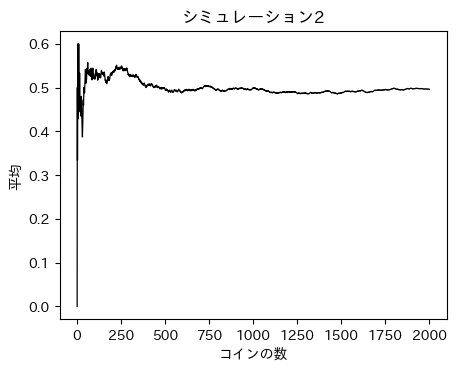

In [6]:
random.seed(123)                     # シード値

head_count = 0                       # 表の数
avr_lst2 = []                        # 平均を格納するリスト

for i in range(1, N+1):              # 1〜2000の整数を使いforループ
    coin = random.randint(0, 1)      # i回目のコイントスの結果
    head_count = head_count + coin   # 表は1、裏は0なので、head_countは表の数
    avr = head_count / i             # i回目の平均を計算
    avr_lst2.append(avr)             # 結果をavr_lst2に追加

plt.plot(sample, avr_lst2,           # 横軸は1〜2000、縦軸は平均
          linewidth=0.9,             # 線の幅
          color="black")             # 線の色
plt.title("シミュレーション2",          # タイトル
          size=12)                   # フォントの大きさ
plt.xlabel("コインの数", size=10)      # 横軸のラベル、フォントの大きさ
plt.ylabel("平均", size=10)           # 縦軸のラベル、フォントの大きさ
plt.show()

### 2つのシミュレーションの比較

授業では扱わない